In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
wh = pd.read_csv('../data/weight-height.csv')

In [3]:
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
print("The Data has {} samples.".format(wh.shape[0]))

The Data has 10000 samples.


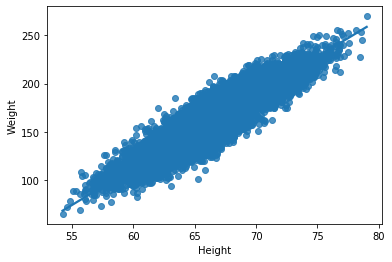

In [5]:
# Let's visualze the data
sb.regplot(x = 'Height', y = 'Weight', data = wh, y_jitter=.03)

In [6]:
wh['Gender'] = wh['Gender'].apply(lambda x : {'Male' : 1, 'Female' : 0}[x])


X = wh.loc[:, ['Height', 'Gender']].values
y = wh.loc[:, 'Weight'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

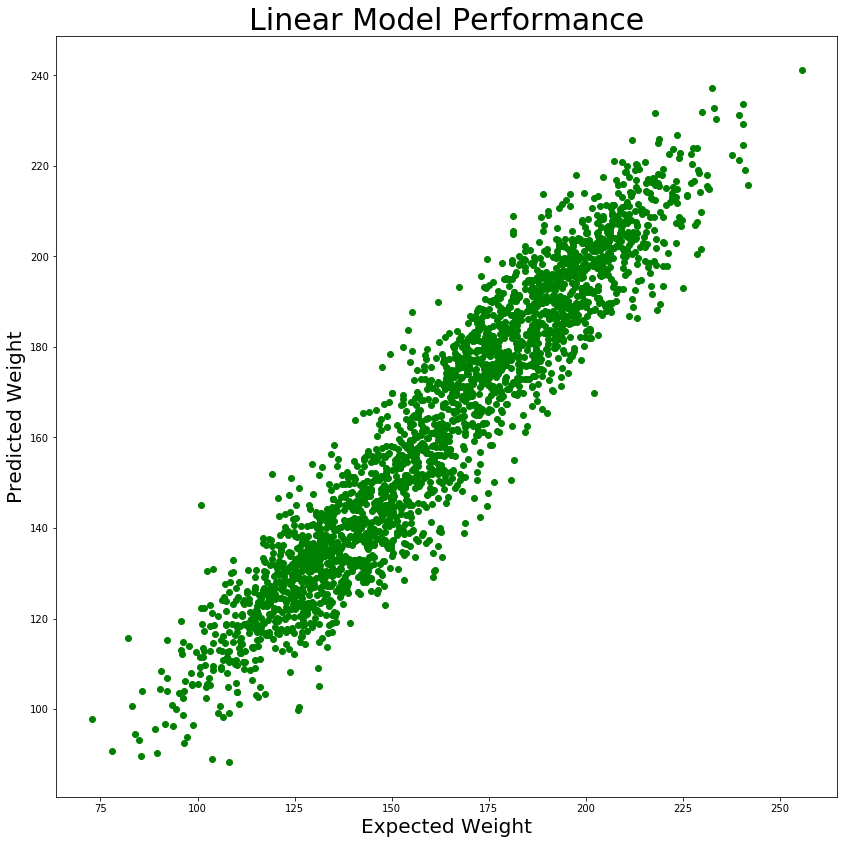

In [13]:
plt.figure(figsize=(14, 14))
plt.scatter(y_test, model.predict(X_test), color = 'green')
plt.title('Linear Model Performance', fontsize = 30)
plt.xlabel('Expected Weight', fontsize = 20)
plt.ylabel('Predicted Weight', fontsize = 20)
plt.savefig('../images/modelperformance.png')
plt.show()